## Import the packages we need
(and define a few functions that will be useful later on!)

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_points(points, ax):
  """
    utility function, do not modify
    plot the given points on the given axis
  """
  x = [point[0] for point in points]
  y = [point[1] for point in points]
  h = [i for i in range(len(points))]
  sns.scatterplot(x=x, y=y, ax=ax, hue=h, s=200, palette='Spectral')

def plot_polynomial(f, points, ax):
  """
    utility function, do not modify
    plot the polynomial on the points given
  """
  x = [point[0] for point in points]
  x = np.arange(min(x), max(x), .001)
  y = [f(z) for z in x]
  sns.lineplot(x=x, y=y, ax=ax, color='black')

def check_points(points):
  """
    utility function, do not modify
    ensure all x values are unique
  """
  xes = [point[0] for point in points]
  s = set(xes)
  assert len(s) == len(xes)

def sort_points(points):
  """
    you don't really need to do this
    i just like to preserve the nice rainbow effect :-)
  """
  x = np.array([point[0] for point in points])
  y = np.array([point[1] for point in points])
  x_ = np.argsort(x)

  x = x[x_]
  y = y[x_]

  return [(x[i], y[i]) for i in range(len(x))]


## Pick any number of points you want to connect
Put them in desired_points.
The format should be (x, y).
Be sure that all x values are unique. (the code will check that they are.)

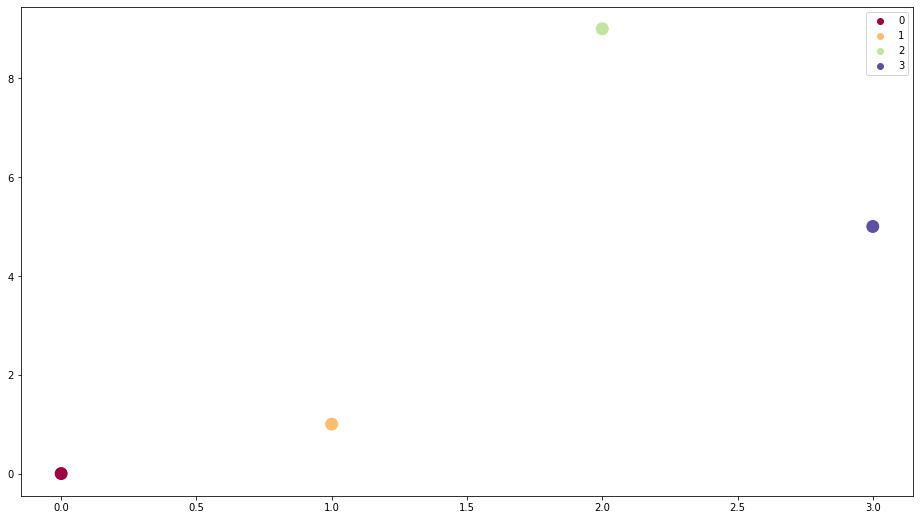

In [128]:
desired_points = [
          (0, 0),
          (1, 1),
          (2, 9),
          (3, 5),
]
desired_points = sort_points(desired_points)
check_points(desired_points)
fig, axs = plt.subplots(1, figsize=(16, 9))
plot_points(desired_points, axs)

## Solve for the polynomial that connects them all

What is our system of equations?
We know our polynomial takes the form $f(x) = c_0 + c_1x + c_2x^2 + ...$

We know the polynomial at a few points. e.g. suppose we know $f(3) = 5$. Then we know:

$$c_0 + c_1 \times 3 + c_2 \times 3^2 + c_3 \times 3^3 + ... = f(3) = 5$$

Below, we'll look at the mathematical representation. It might look a little dense, but the system of equations it represents is nothing more than the equation we are looking at above, repeated for every point we know our polynomial at!

If we know a whole lot of other points $(x_i, f(x_i))$, we have an equation of the form

$$Ac = b$$

where $$c = (c_0, c_1, c_2, ...)$$

$$b = (f(x_0), f(x_1), f(x_2), ...)$$

and $$A_{ij} = x_i^{j - 1}$$

In the code below, we are going to set this up for the polynomial that connects all of the desired points above.

In [129]:
degree = len(desired_points) - 1

# Set up the objects we are going to solve
A = np.empty((degree + 1, degree + 1))
b = np.empty((degree + 1, ))

# set up the system of equations:
for i in range(len(desired_points)):

  x, y = desired_points[i]
  b[i] = y
  for j in range(len(desired_points)):
    A[i, j] = x ** j

# solve the system
coefficients = np.linalg.inv(A) @ b
coefficients # read from L to R

array([ 0.        , -8.83333333, 13.        , -3.16666667])

## Here we turn our coefficient into a polynomial function

In [130]:
def create_polynomial(coefficients):
  """
    create a polynomial function given a set of coefficients.
    note that this is a function that returns a function!

  """

  def f(x):
    """
      function that returns the value of the polynomial.
      we are creating this function within another function! kind of cool

    """
    # z is a variable that will mean a few different things
    # as the computation progresses.
    # what it means at any given time is shown in a comment to the side.

    z = np.ones(len(coefficients)) * x    # z = (x, x, x, x, x, ...
    z = z ** np.arange(len(coefficients)) # z = (x^0, x^1, x^2, ...
    z = z @ coefficients                  # z = c0 x^0 + c1 x^1 + c2 x^2 + ...

    # at this point, z is a single number that is the value of our polynomial
    # evaluated at x. now we return z.
    return z 

  # f(x) is our polynomial that we can now return.
  return f

f = create_polynomial(coefficients)

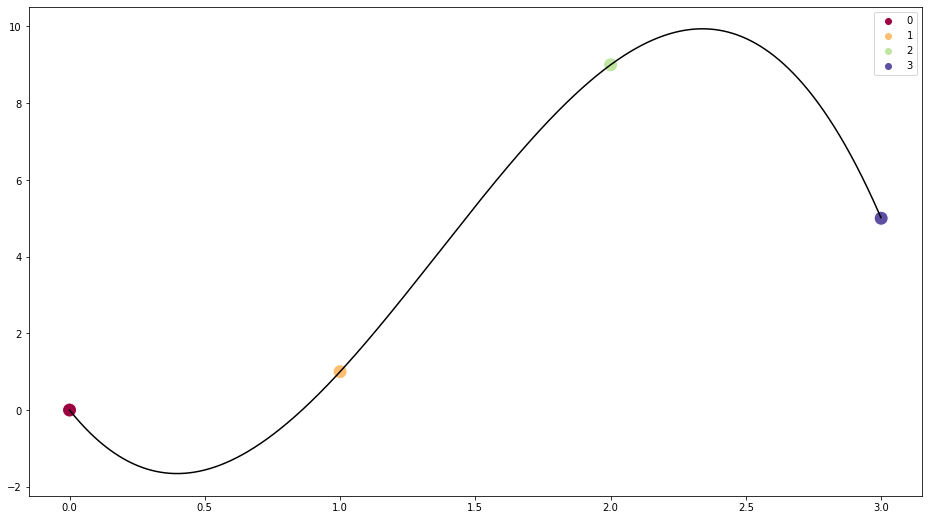

In [131]:
fig, axs = plt.subplots(1, figsize=(16, 9))

plot_points(desired_points, axs)
plot_polynomial(f, desired_points, axs)